## Intracellular vesicles 

Related to this image.sc question https://forum.image.sc/t/need-help-with-counting-and-measuring-the-size-of-intracellular-vesicles/99170

In this question the user is trying to segment intracellular vesicles which seem to be of two type, large and darker than the cell.  Or small and brighter.

Question:  Can stardist (or other deep learning approach) detect large/small, bright/dark with the same model? 

To answer that let's do a simulation

1.  Goal is not to create a model that is biologically relevant. 
2.  Goal is to test the behavior of networks on objects of varying size and brightness 
3.  Goal is to test that the network(s) are wired right.
4.  If the simulation works move on to biological images. 

In [54]:
from tnia.deconvolution import psfs
from tnia.deconvolution import forward
from tnia.plotting.plt_helper import imshow_multi2d
from tnia.deeplearning.dl_helper import make_label_directory
from pathlib import Path
import os

tnia_images_path = Path(r'D:/images')
parent_path=Path(tnia_images_path / r'tnia-python-images\imagesc\2024_07_17_intracellular_vesicles')

if not os.path.exists(parent_path):
    os.makedirs(parent_path)

simulation_path = Path(parent_path / 'simulation')

if not os.path.exists(simulation_path):
    os.makedirs(simulation_path)

label_path = Path(parent_path / r'labels')

image_label_paths, mask_label_paths = make_label_directory(1, 1, label_path)

In [55]:
import napari
import numpy as np

imsize = (1024, 1024)

background = np.zeros(imsize, 'uint16')
background[:,:]=100
truth = np.zeros(imsize, 'uint16')

viewer = napari.Viewer()
viewer.add_image(background, name='background')
viewer.add_labels(truth, name='truth')

<Labels layer 'truth' at 0x1e59ee38ca0>

In [56]:
import raster_geometry as rg
# import uniform
from random import uniform, seed

backup = truth.copy()


In [57]:
num = 170
min_r = 20
max_r = 40
min_intensity = 5
max_intensity = 15

labels = np.zeros(imsize, 'uint16')
label_num =1

for i in range(num):
    r=uniform(min_r, max_r)
    r=int(r)
    cx=round(uniform(r,truth.shape[1]-r))
    cy=round(uniform(r,truth.shape[0]-r))

    if truth[cy,cx]==0:
        continue
    intensity=round(uniform(min_intensity, max_intensity))
    #print(r,cx,cy,intensity)
    
    temp1=rg.circle([r*2,r*2],r)
    temp2=np.zeros_like(truth)
    temp2[cy-r:cy+r,cx-r:cx+r]=temp1
    truth[temp2>0]=intensity

    labels[temp2>0]=label_num
    label_num+=1



In [58]:
num = 200
min_r = 5
max_r = 20
min_intensity = 70
max_intensity = 135


for i in range(num):
    r=uniform(min_r, max_r)
    r=int(r)
    cx=round(uniform(r,truth.shape[1]-r))
    cy=round(uniform(r,truth.shape[0]-r))

    if truth[cy,cx]==0:
        continue
    intensity=round(uniform(min_intensity, max_intensity))
    #print(r,cx,cy,intensity)
    
    temp1=rg.circle([r*2,r*2],r)
    temp2=np.zeros_like(truth)
    temp2[cy-r:cy+r,cx-r:cx+r]=temp1
    truth[temp2>0]=intensity
    labels[temp2>0]=label_num
    label_num+=1



In [59]:
truth2 = truth.copy()
viewer.add_image(truth2, name='truth2')
viewer.add_labels(labels, name='labels')

<Labels layer 'labels' at 0x1e5a2150cd0>

In [60]:
truth.sum()
truth.max(), truth.min()

(135, 0)

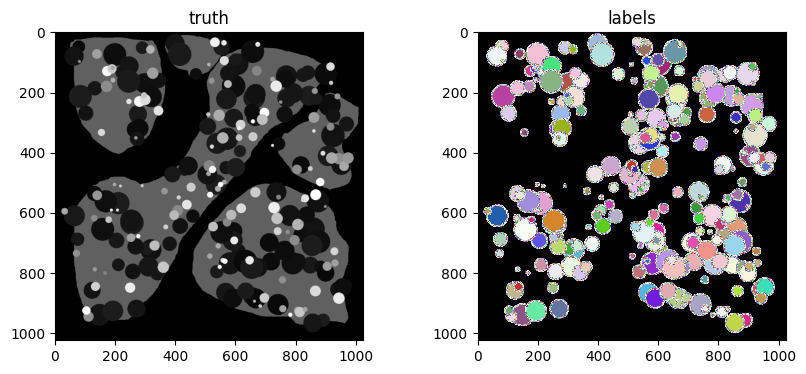

In [61]:
from tnia.plotting.plt_helper import imshow_multi2d
from tnia.plotting.plt_helper import random_label_cmap

fig = imshow_multi2d([truth, labels], ['truth', 'labels'], 1, 2, colormaps = ['gray', random_label_cmap()])

1.0
0 135


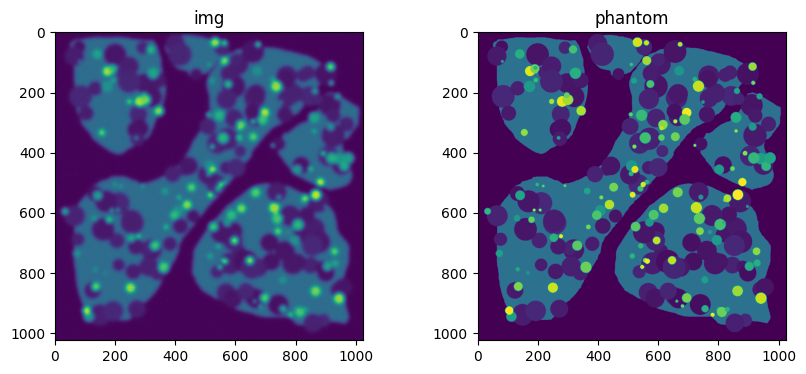

In [62]:
from tnia.deconvolution.gaussian_psf import gaussian_2d

psf = gaussian_2d(100, 6)

print(psf.sum())
print(truth.min(), truth.max())
img = forward.forward(5*truth, psf, 8,True, True).astype(np.float32)
fig = imshow_multi2d([img, truth], ["img", "phantom"], 1, 2)



## Save the simulated images

In [63]:
from skimage.io import imsave

name = 'phantom'
index = 0

phantom_name=parent_path / (name+str(index)+'.tif')

while (os.path.exists(phantom_name)==True):
    index=index+1
    phantom_name=parent_path / (name+'_'+str(index)+'.tif')

print(phantom_name)

imsave(parent_path / phantom_name, img)
imsave(simulation_path / phantom_name, truth)

D:\images\tnia-python-images\imagesc\2024_07_17_intracellular_vesicles\phantom_1.tif


C:\Users\bnort\AppData\Local\Temp\ipykernel_72128\1248959616.py:15: UserWarning: D:\images\tnia-python-images\imagesc\2024_07_17_intracellular_vesicles\phantom_1.tif is a low contrast image
  imsave(simulation_path / phantom_name, truth)


## Save the labels

In this case the labels are derived directly from the simulation, so we just save the img and label generated during the simulation in the directory structure we have been using to store labels.

In [64]:
from tnia.deeplearning.dl_helper import generate_patch_names, generate_next_patch_name

name = 'label'

phantom_name, mask_name = generate_patch_names(str(image_label_paths[0]), str(mask_label_paths[0]), name)

base_name = generate_next_patch_name(str(image_label_paths[0]), name)

print(base_name)
print(phantom_name)
print(mask_name)

imsave(phantom_name, img)
imsave(mask_name, labels)

label_1
D:\images\tnia-python-images\imagesc\2024_07_17_intracellular_vesicles\labels\input0/label_1.tif
D:\images\tnia-python-images\imagesc\2024_07_17_intracellular_vesicles\labels\ground truth0/label_1.tif
label_1


D:\images\tnia-python-images\imagesc\2024_07_17_intracellular_vesicles\labels\input0/label_1.tif


C:\Users\bnort\AppData\Local\Temp\ipykernel_72128\1726715714.py:3: UserWarning: D:\images\tnia-python-images\imagesc\2024_07_17_intracellular_vesicles\labels\ground truth0/label_1.tif is a low contrast image
  imsave(mask_name, labels)


In [20]:
viewer = napari.Viewer()
viewer.add_image(img, name='img')
viewer.add_image(truth, name='truth')

<Image layer 'truth' at 0x16a0d69d640>